In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes 2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [5]:
y = df['Outcome'].values
x = df.loc[:,df.columns!='Outcome'].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [7]:
from sklearn.preprocessing import StandardScaler
stdx = StandardScaler()

In [9]:
x_train = stdx.fit_transform(x_train)
x_test = stdx.fit_transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)



KNeighborsClassifier()

In [11]:
y_pred = knn.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [13]:
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.6822916666666666
Error Rate: 0.31770833333333337
Precision: 0.5645161290322581
Recall: 0.5072463768115942


In [14]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[96 27]
 [34 35]]


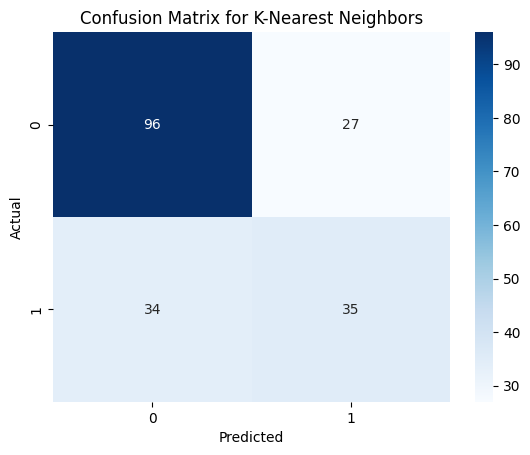

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()